In [4]:
from matplotlib import pyplot as plt

import transforms
from dataset.FastPatchExtractor import FastPatchExtractor
from skimage.metrics import structural_similarity as ssim
import torch

from img_utils import ImageLoader
from kernels import gaussian_kernel_generator
from operators import BlurOperator, append_noise

In [10]:
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(DEVICE)

cuda


In [11]:
file = "./data/material_pt_nr/train.png"
#file = "./data/set12/01.png"
normalization = transforms.Compose([image_normalization()])
ground_truth_image = ImageLoader(file)

NameError: name 'ImageLoader' is not defined

In [7]:
blur_kernel_size = 11
blur_kernel_std = 5
noise_std=1

In [9]:
kernel = gaussian_kernel_generator(blur_kernel_size, blur_kernel_std).to(DEVICE)
blur_operator = BlurOperator(kernel, device=DEVICE)
blurred_image = blur_operator(ground_truth_image.to(DEVICE))
blurred_image_noisy = append_noise(blurred_image, std=noise_std, device=DEVICE)

RuntimeError: Input type (torch.cuda.ByteTensor) and weight type (torch.cuda.FloatTensor) should be the same

In [106]:
def plot_images(img0, img1, img2, selected_patch=85, p_size=30):
    image0 = img0.to('cpu')
    image1 = img1.to('cpu')
    image2 = img2.to('cpu')
    out_dim = (p_size, p_size)
    patch_extractor = FastPatchExtractor(p_dim=30)
    p_image0 = torch.reshape(patch_extractor.extract(image0.unsqueeze(0))[selected_patch], out_dim)
    p_image1 = torch.reshape(patch_extractor.extract(image1.unsqueeze(0))[selected_patch], out_dim)
    p_image2 = torch.reshape(patch_extractor.extract(image2.unsqueeze(0))[selected_patch], out_dim)
    fig, axes = plt.subplots(2, 3, figsize=(10, 5))
    axes[0][0].imshow(image0.squeeze(), cmap='gray')
    #axes[0][0].set_title('Clean')
    axes[0][0].axis('off')
    axes[0][1].imshow(image1.squeeze(), cmap='gray')
   # axes[0][1].set_title(f'Gaussian Blur with k={blur_kernel_size} and std={blur_kernel_std}')
    axes[0][1].axis('off')

    axes[0][2].imshow(image2.squeeze(), cmap='gray')
   # axes[0][2].set_title(f'Blur + Gaussian noise std={noise_std}')
    axes[0][2].axis('off')

    axes[1][0].imshow(p_image0.squeeze(), cmap='gray')
    axes[1][0].axis('off')

    axes[1][1].imshow(p_image1.squeeze(), cmap='gray')
    axes[1][1].axis('off')

    axes[1][2].imshow(p_image2.squeeze(), cmap='gray')
    axes[1][2].axis('off')
    plt.tight_layout()
    plt.show()

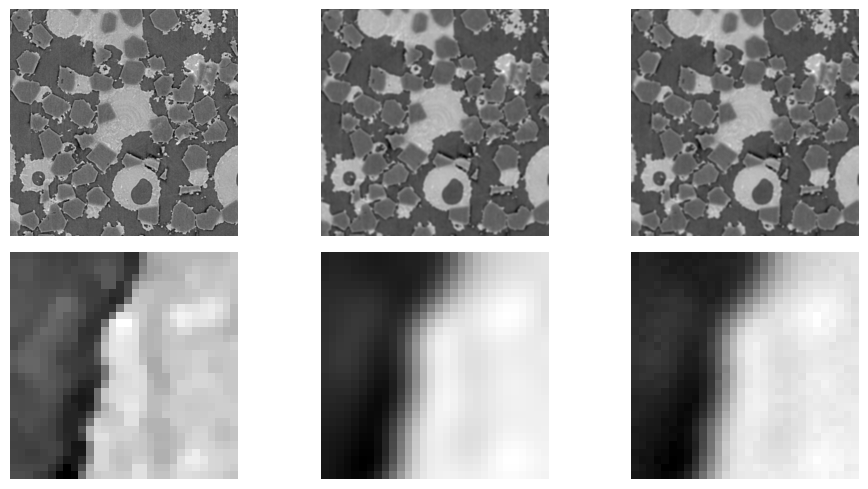

In [107]:
plot_images(ground_truth_image, blurred_image, blurred_image_noisy)

In [108]:
print(f'SSIM-Clean-Blurred: {ssim(ground_truth_image.squeeze().numpy(), blurred_image.squeeze().numpy(), data_range=1)}')
print(f'SSIM-Clean-Noise: {ssim(ground_truth_image.squeeze().numpy(), blurred_image_noisy.squeeze().numpy(), data_range=1)}')

SSIM-Clean-Blurred: 0.7322857456720525
SSIM-Clean-Noise: 0.7263011996122538
